# Proyecto: Producción no convencional de petróleo y gas en Argentina

## Notebook 4: Aprendizaje no Supervisado - Modelos de Kmeans 

## Carga de datos

In [348]:
#Importamos librerías con las que se van a trabajar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns
from scipy import stats
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import warnings
# Ignorar todos los warnings
warnings.filterwarnings('ignore')
# Ignorar un warning específico por categoría
warnings.filterwarnings('ignore', category=DeprecationWarning)

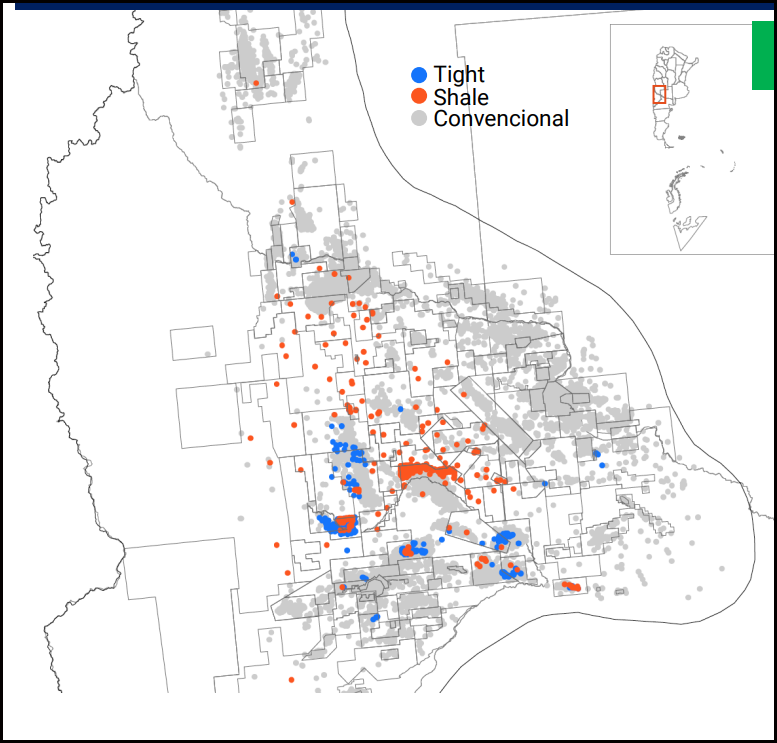

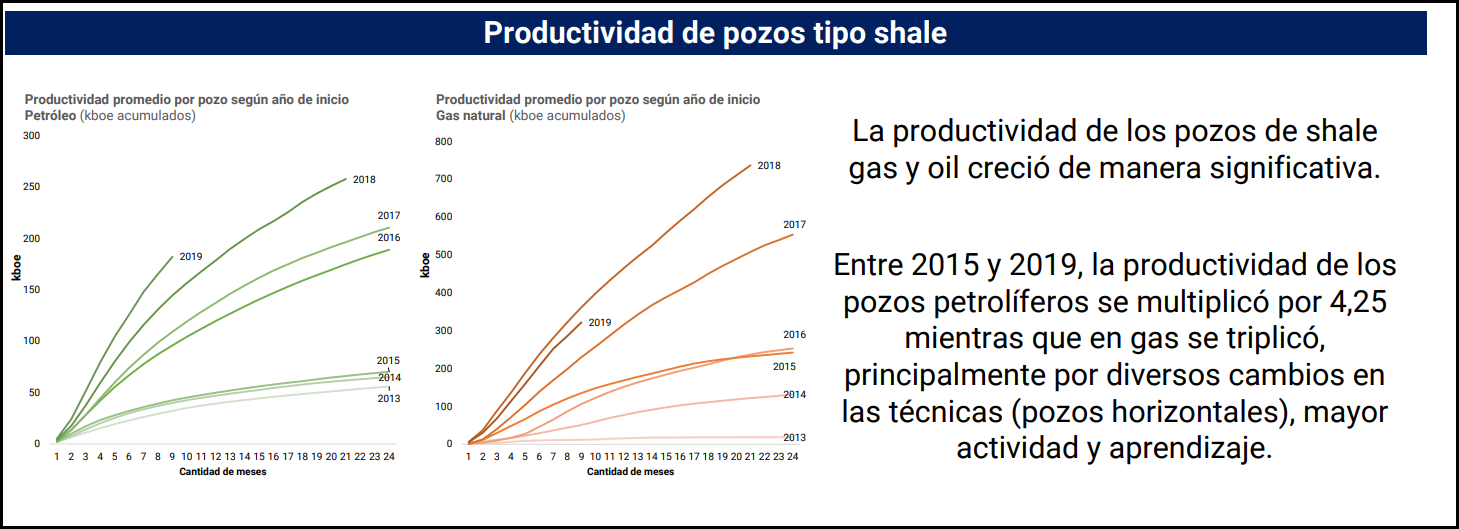

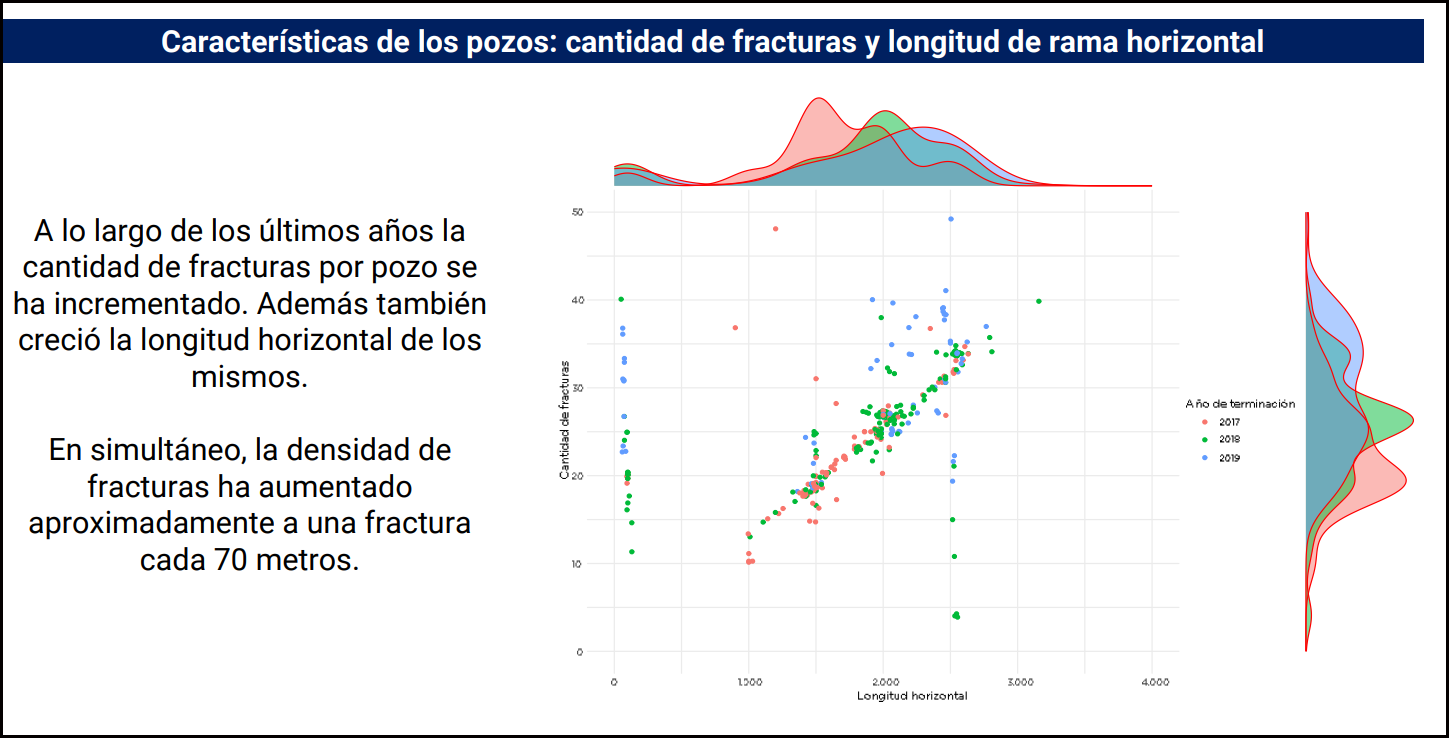

In [349]:
#Lectura del archivo .csv y guardado con el nombre "fracturas"
fracturas = pd.read_csv('fracturas.csv')
fracturas

,id_base_fractura_adjiv,idpozo,sigla,cuenca,areapermisoconcesion,yacimiento,formacion_productiva,tipo_reservorio,subtipo_reservorio,longitud_rama_horizontal_m,...,fecha_data,anio_if,mes_if,anio_ff,mes_ff,anio_carga,mes_carga,empresa_informante,mes,anio
0,30,159910,APS.Nq.ADC.xp-1033,NEUQUINA,AGUA DEL CAJON,AGUA DEL CAJON,los molles,NO CONVENCIONAL,SHALE,0.0,...,2019-06-14 17:13:03.68279,2019,4,2019,4,2019,6,CAPEX S.A.,4,2019
1,31,159910,APS.Nq.ADC.xp-1033,NEUQUINA,AGUA DEL CAJON,AGUA DEL CAJON,los molles,NO CONVENCIONAL,SHALE,0.0,...,2019-06-14 17:14:19.179874,2018,11,2018,11,2019,6,CAPEX S.A.,11,2018
2,37,159219,YPF.Nq.AdlA-1001(h),NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1437.3,...,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.,11,2017
3,38,159220,YPF.Nq.AdlA-1002(h),NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1518.3,...,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.,11,2017
4,39,159221,YPF.Nq.AdlA-1003(h),NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1482.3,...,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.,11,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576,4253,164653,YPF.Nq.LCav-113(h),NEUQUINA,BANDURRIA SUR,BANDURRIA SUR,vaca muerta,NO CONVENCIONAL,SHALE,3830.0,...,2023-10-12 10:01:41.99565,2023,7,2023,8,2023,10,YPF S.A.,7,2023
3577,4254,164654,YPF.Nq.LCav-114(h),NEUQUINA,BANDURRIA SUR,BANDURRIA SUR,vaca muerta,NO CONVENCIONAL,SHALE,3638.0,...,2023-10-12 10:01:41.99565,2023,7,2023,8,2023,10,YPF S.A.,7,2023
3578,4255,164456,PLU.Nq.LCa-3098(h),NEUQUINA,LA CALERA,LA CALERA,vaca muerta,NO CONVENCIONAL,SHALE,2587.0,...,2023-10-24 12:37:12.445477,2023,9,2023,10,2023,10,PLUSPETROL S.A.,9,2023
3579,4256,164528,PLU.Nq.LCa-3099(h),NEUQUINA,LA CALERA,LA CALERA,vaca muerta,NO CONVENCIONAL,SHALE,2654.0,...,2023-10-24 12:39:58.392624,2023,9,2023,10,2023,10,PLUSPETROL S.A.,9,2023


In [350]:
fracturas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3581 entries, 0 to 3580
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_base_fractura_adjiv        3581 non-null   int64  
 1   idpozo                        3581 non-null   int64  
 2   sigla                         3581 non-null   object 
 3   cuenca                        3581 non-null   object 
 4   areapermisoconcesion          3581 non-null   object 
 5   yacimiento                    3581 non-null   object 
 6   formacion_productiva          3581 non-null   object 
 7   tipo_reservorio               3544 non-null   object 
 8   subtipo_reservorio            2671 non-null   object 
 9   longitud_rama_horizontal_m    3581 non-null   float64
 10  cantidad_fracturas            3581 non-null   int64  
 11  tipo_terminacion              3581 non-null   object 
 12  arena_bombeada_nacional_tn    3581 non-null   float64
 13  are

Se podría usar subtipo_reservorio

In [351]:
fracturas.columns

Index(['id_base_fractura_adjiv', 'idpozo', 'sigla', 'cuenca',
       'areapermisoconcesion', 'yacimiento', 'formacion_productiva',
       'tipo_reservorio', 'subtipo_reservorio', 'longitud_rama_horizontal_m',
       'cantidad_fracturas', 'tipo_terminacion', 'arena_bombeada_nacional_tn',
       'arena_bombeada_importada_tn', 'agua_inyectada_m3', 'co2_inyectado_m3',
       'presion_maxima_psi', 'potencia_equipos_fractura_hp',
       'fecha_inicio_fractura', 'fecha_fin_fractura', 'fecha_data', 'anio_if',
       'mes_if', 'anio_ff', 'mes_ff', 'anio_carga', 'mes_carga',
       'empresa_informante', 'mes', 'anio'],
      dtype='object')

In [352]:
#Generamos un nuevo dataframe con las variables de interés
fracturas_selecc = fracturas[['anio','mes','idpozo','cuenca', 'yacimiento', 'formacion_productiva',
       'tipo_reservorio','subtipo_reservorio', 'longitud_rama_horizontal_m',
       'cantidad_fracturas', 'tipo_terminacion', 'arena_bombeada_nacional_tn',
       'arena_bombeada_importada_tn', 'agua_inyectada_m3', 'co2_inyectado_m3',
       'presion_maxima_psi', 'potencia_equipos_fractura_hp',
       'fecha_inicio_fractura', 'fecha_fin_fractura', 'fecha_data', 
       'empresa_informante']]
fracturas_selecc

,anio,mes,idpozo,cuenca,yacimiento,formacion_productiva,tipo_reservorio,subtipo_reservorio,longitud_rama_horizontal_m,cantidad_fracturas,...,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,co2_inyectado_m3,presion_maxima_psi,potencia_equipos_fractura_hp,fecha_inicio_fractura,fecha_fin_fractura,fecha_data,empresa_informante
0,2019,4,159910,NEUQUINA,AGUA DEL CAJON,los molles,NO CONVENCIONAL,SHALE,0.0,3,...,0.00000,0.000,2718.20,0.0,10190.000000,10897.00,2019-04-20,2019-04-30,2019-06-14 17:13:03.68279,CAPEX S.A.
1,2018,11,159910,NEUQUINA,AGUA DEL CAJON,los molles,NO CONVENCIONAL,SHALE,0.0,1,...,0.00000,0.000,600.00,0.0,9250.000000,10251.00,2018-11-02,2018-11-03,2019-06-14 17:14:19.179874,CAPEX S.A.
2,2017,11,159219,NEUQUINA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1437.3,18,...,3761.37000,536.850,25768.30,0.0,15000.000000,32000.00,2017-11-19,2017-12-14,2019-06-27 13:46:21.14935,YPF S.A.
3,2017,11,159220,NEUQUINA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1518.3,19,...,3903.70500,558.225,27398.37,0.0,11348.000000,32000.00,2017-11-21,2017-12-15,2019-06-27 13:46:21.14935,YPF S.A.
4,2017,11,159221,NEUQUINA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1482.3,19,...,3949.02000,569.925,27157.60,0.0,11076.000000,32000.00,2017-11-18,2017-12-15,2019-06-27 13:46:21.14935,YPF S.A.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576,2023,7,164653,NEUQUINA,BANDURRIA SUR,vaca muerta,NO CONVENCIONAL,SHALE,3830.0,64,...,14335.95285,0.000,86668.77,0.0,11800.112302,40000.00,2023-07-10,2023-08-08,2023-10-12 10:01:41.99565,YPF S.A.
3577,2023,7,164654,NEUQUINA,BANDURRIA SUR,vaca muerta,NO CONVENCIONAL,SHALE,3638.0,53,...,12376.44900,0.000,74442.31,0.0,11800.112302,40000.00,2023-07-12,2023-08-07,2023-10-12 10:01:41.99565,YPF S.A.
3578,2023,9,164456,NEUQUINA,LA CALERA,vaca muerta,NO CONVENCIONAL,SHALE,2587.0,40,...,9060.82000,0.000,68558.00,0.0,11464.000000,20418.63,2023-09-18,2023-10-13,2023-10-24 12:37:12.445477,PLUSPETROL S.A.
3579,2023,9,164528,NEUQUINA,LA CALERA,vaca muerta,NO CONVENCIONAL,SHALE,2654.0,41,...,9309.48000,0.000,70011.00,0.0,11332.000000,21142.29,2023-09-18,2023-10-13,2023-10-24 12:39:58.392624,PLUSPETROL S.A.


In [353]:
fracturas_selecc['tipo_reservorio'].unique()

array(['NO CONVENCIONAL', nan, 'CONVENCIONAL'], dtype=object)

In [354]:
fracturas_filtro = fracturas_selecc[(fracturas_selecc['anio'] >= 2009) & 
                            (fracturas_selecc['anio'] <=2022) &
                            (fracturas_selecc['tipo_reservorio'] =='NO CONVENCIONAL') &
                            (fracturas_selecc['cuenca'] == 'NEUQUINA')]
fracturas_filtro

,anio,mes,idpozo,cuenca,yacimiento,formacion_productiva,tipo_reservorio,subtipo_reservorio,longitud_rama_horizontal_m,cantidad_fracturas,...,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,co2_inyectado_m3,presion_maxima_psi,potencia_equipos_fractura_hp,fecha_inicio_fractura,fecha_fin_fractura,fecha_data,empresa_informante
0,2019,4,159910,NEUQUINA,AGUA DEL CAJON,los molles,NO CONVENCIONAL,SHALE,0.0,3,...,0.000,0.000,2718.20,0.0,10190.0,10897.0,2019-04-20,2019-04-30,2019-06-14 17:13:03.68279,CAPEX S.A.
1,2018,11,159910,NEUQUINA,AGUA DEL CAJON,los molles,NO CONVENCIONAL,SHALE,0.0,1,...,0.000,0.000,600.00,0.0,9250.0,10251.0,2018-11-02,2018-11-03,2019-06-14 17:14:19.179874,CAPEX S.A.
2,2017,11,159219,NEUQUINA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1437.3,18,...,3761.370,536.850,25768.30,0.0,15000.0,32000.0,2017-11-19,2017-12-14,2019-06-27 13:46:21.14935,YPF S.A.
3,2017,11,159220,NEUQUINA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1518.3,19,...,3903.705,558.225,27398.37,0.0,11348.0,32000.0,2017-11-21,2017-12-15,2019-06-27 13:46:21.14935,YPF S.A.
4,2017,11,159221,NEUQUINA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1482.3,19,...,3949.020,569.925,27157.60,0.0,11076.0,32000.0,2017-11-18,2017-12-15,2019-06-27 13:46:21.14935,YPF S.A.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551,2022,8,163626,NEUQUINA,MATA MORA NORTE,vaca muerta,NO CONVENCIONAL,SHALE,1896.0,29,...,7917.000,0.000,52998.00,0.0,12000.0,25000.0,2022-08-25,2022-09-11,2023-09-26 16:07:25.629207,KILWER S.A.
3552,2022,8,163627,NEUQUINA,MATA MORA NORTE,vaca muerta,NO CONVENCIONAL,SHALE,1910.0,29,...,7737.000,0.000,52161.00,0.0,12000.0,25000.0,2022-08-24,2022-09-10,2023-09-26 16:08:35.124861,KILWER S.A.
3553,2022,10,163793,NEUQUINA,MATA MORA NORTE,vaca muerta,NO CONVENCIONAL,SHALE,2037.0,31,...,8081.000,0.000,53440.00,0.0,12000.0,25000.0,2022-10-15,2022-10-26,2023-09-26 16:10:00.850808,KILWER S.A.
3554,2022,10,163794,NEUQUINA,MATA MORA NORTE,vaca muerta,NO CONVENCIONAL,SHALE,1687.0,26,...,6625.000,0.000,44465.00,0.0,12000.0,25000.0,2022-10-15,2022-10-24,2023-09-26 16:12:00.93711,KILWER S.A.


In [355]:
#valores nulos
valores_faltantes = fracturas_filtro.isnull().sum().sort_values(ascending = False) 
# contabiliza datos nulos y los ordena de mayor a menor según la columna
valores_faltantes

potencia_equipos_fractura_hp    35
subtipo_reservorio               2
anio                             0
arena_bombeada_nacional_tn       0
fecha_data                       0
fecha_fin_fractura               0
fecha_inicio_fractura            0
presion_maxima_psi               0
co2_inyectado_m3                 0
agua_inyectada_m3                0
arena_bombeada_importada_tn      0
tipo_terminacion                 0
mes                              0
cantidad_fracturas               0
longitud_rama_horizontal_m       0
tipo_reservorio                  0
formacion_productiva             0
yacimiento                       0
cuenca                           0
idpozo                           0
empresa_informante               0
dtype: int64

In [356]:
scaler = MinMaxScaler()

#realizamos una copia del dataframe
fracturas_filtro_escalado =fracturas_filtro.copy()

#usamos el escalador para ajustar y transformar las columnas numéricas
fracturas_filtro_escalado[['longitud_rama_horizontal_m',
       'cantidad_fracturas', 'arena_bombeada_nacional_tn',
       'arena_bombeada_importada_tn', 'agua_inyectada_m3', 'co2_inyectado_m3',
       'presion_maxima_psi', 'potencia_equipos_fractura_hp']] = scaler.fit_transform(fracturas_filtro_escalado[['longitud_rama_horizontal_m',
       'cantidad_fracturas', 'arena_bombeada_nacional_tn',
       'arena_bombeada_importada_tn', 'agua_inyectada_m3', 'co2_inyectado_m3',
       'presion_maxima_psi', 'potencia_equipos_fractura_hp']])

fracturas_filtro_escalado

,anio,mes,idpozo,cuenca,yacimiento,formacion_productiva,tipo_reservorio,subtipo_reservorio,longitud_rama_horizontal_m,cantidad_fracturas,...,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,co2_inyectado_m3,presion_maxima_psi,potencia_equipos_fractura_hp,fecha_inicio_fractura,fecha_fin_fractura,fecha_data,empresa_informante
0,2019,4,159910,NEUQUINA,AGUA DEL CAJON,los molles,NO CONVENCIONAL,SHALE,0.000000,0.028169,...,0.000000,0.000000,0.005060,0.0,0.467002,0.21794,2019-04-20,2019-04-30,2019-06-14 17:13:03.68279,CAPEX S.A.
1,2018,11,159910,NEUQUINA,AGUA DEL CAJON,los molles,NO CONVENCIONAL,SHALE,0.000000,0.000000,...,0.000000,0.000000,0.001117,0.0,0.423923,0.20502,2018-11-02,2018-11-03,2019-06-14 17:14:19.179874,CAPEX S.A.
2,2017,11,159219,NEUQUINA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,0.321041,0.239437,...,0.219360,0.045343,0.047969,0.0,0.687442,0.64000,2017-11-19,2017-12-14,2019-06-27 13:46:21.14935,YPF S.A.
3,2017,11,159220,NEUQUINA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,0.339133,0.253521,...,0.227661,0.047149,0.051004,0.0,0.520073,0.64000,2017-11-21,2017-12-15,2019-06-27 13:46:21.14935,YPF S.A.
4,2017,11,159221,NEUQUINA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,0.331092,0.253521,...,0.230304,0.048137,0.050555,0.0,0.507607,0.64000,2017-11-18,2017-12-15,2019-06-27 13:46:21.14935,YPF S.A.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551,2022,8,163626,NEUQUINA,MATA MORA NORTE,vaca muerta,NO CONVENCIONAL,SHALE,0.423498,0.394366,...,0.461713,0.000000,0.098659,0.0,0.549954,0.50000,2022-08-25,2022-09-11,2023-09-26 16:07:25.629207,KILWER S.A.
3552,2022,8,163627,NEUQUINA,MATA MORA NORTE,vaca muerta,NO CONVENCIONAL,SHALE,0.426625,0.394366,...,0.451216,0.000000,0.097101,0.0,0.549954,0.50000,2022-08-24,2022-09-10,2023-09-26 16:08:35.124861,KILWER S.A.
3553,2022,10,163793,NEUQUINA,MATA MORA NORTE,vaca muerta,NO CONVENCIONAL,SHALE,0.454992,0.422535,...,0.471278,0.000000,0.099482,0.0,0.549954,0.50000,2022-10-15,2022-10-26,2023-09-26 16:10:00.850808,KILWER S.A.
3554,2022,10,163794,NEUQUINA,MATA MORA NORTE,vaca muerta,NO CONVENCIONAL,SHALE,0.376815,0.352113,...,0.386365,0.000000,0.082774,0.0,0.549954,0.50000,2022-10-15,2022-10-24,2023-09-26 16:12:00.93711,KILWER S.A.


In [357]:
fracturas_filtro_escalado['idpozo'].nunique()

2308

In [358]:
#Generamos un nuevo dataframe con las variables de interés
fracturas_selecc3 = fracturas_filtro_escalado[['idpozo','subtipo_reservorio', 'longitud_rama_horizontal_m',
       'cantidad_fracturas', 'tipo_terminacion', 'arena_bombeada_nacional_tn',
       'arena_bombeada_importada_tn', 'agua_inyectada_m3', 'co2_inyectado_m3',]]

fracturas_selecc3.head()


,idpozo,subtipo_reservorio,longitud_rama_horizontal_m,cantidad_fracturas,tipo_terminacion,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,co2_inyectado_m3
0,159910,SHALE,0.000000,0.028169,Punzado,0.000000,0.000000,0.005060,0.0
1,159910,SHALE,0.000000,0.000000,Punzado,0.000000,0.000000,0.001117,0.0
2,159219,SHALE,0.321041,0.239437,Tapón disparo,0.219360,0.045343,0.047969,0.0
3,159220,SHALE,0.339133,0.253521,Tapón disparo,0.227661,0.047149,0.051004,0.0
4,159221,SHALE,0.331092,0.253521,Tapón disparo,0.230304,0.048137,0.050555,0.0


In [359]:
fracturas_selecc3.describe()

,idpozo,longitud_rama_horizontal_m,cantidad_fracturas,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,co2_inyectado_m3
count,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000
mean,157484.429542,0.255335,0.261376,0.213069,0.049731,0.049984,0.015080
std,6116.677942,0.256393,0.229914,0.240633,0.084031,0.060556,0.085926
min,130158.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154940.750000,0.000000,0.056338,0.003778,0.000000,0.006548,0.000000
50%,159336.500000,0.251742,0.211268,0.056454,0.027766,0.031850,0.000000
75%,162195.250000,0.488776,0.436620,0.412562,0.066363,0.083781,0.000000
max,164578.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [360]:
fracturas_selecc3

,idpozo,subtipo_reservorio,longitud_rama_horizontal_m,cantidad_fracturas,tipo_terminacion,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,co2_inyectado_m3
0,159910,SHALE,0.000000,0.028169,Punzado,0.000000,0.000000,0.005060,0.0
1,159910,SHALE,0.000000,0.000000,Punzado,0.000000,0.000000,0.001117,0.0
2,159219,SHALE,0.321041,0.239437,Tapón disparo,0.219360,0.045343,0.047969,0.0
3,159220,SHALE,0.339133,0.253521,Tapón disparo,0.227661,0.047149,0.051004,0.0
4,159221,SHALE,0.331092,0.253521,Tapón disparo,0.230304,0.048137,0.050555,0.0
...,...,...,...,...,...,...,...,...,...
3551,163626,SHALE,0.423498,0.394366,Tapón disparo,0.461713,0.000000,0.098659,0.0
3552,163627,SHALE,0.426625,0.394366,Tapón disparo,0.451216,0.000000,0.097101,0.0
3553,163793,SHALE,0.454992,0.422535,Tapón disparo,0.471278,0.000000,0.099482,0.0
3554,163794,SHALE,0.376815,0.352113,Tapón disparo,0.386365,0.000000,0.082774,0.0


In [361]:
fracturas_selecc3.to_csv('fracturas_selecc3.csv', index = False)

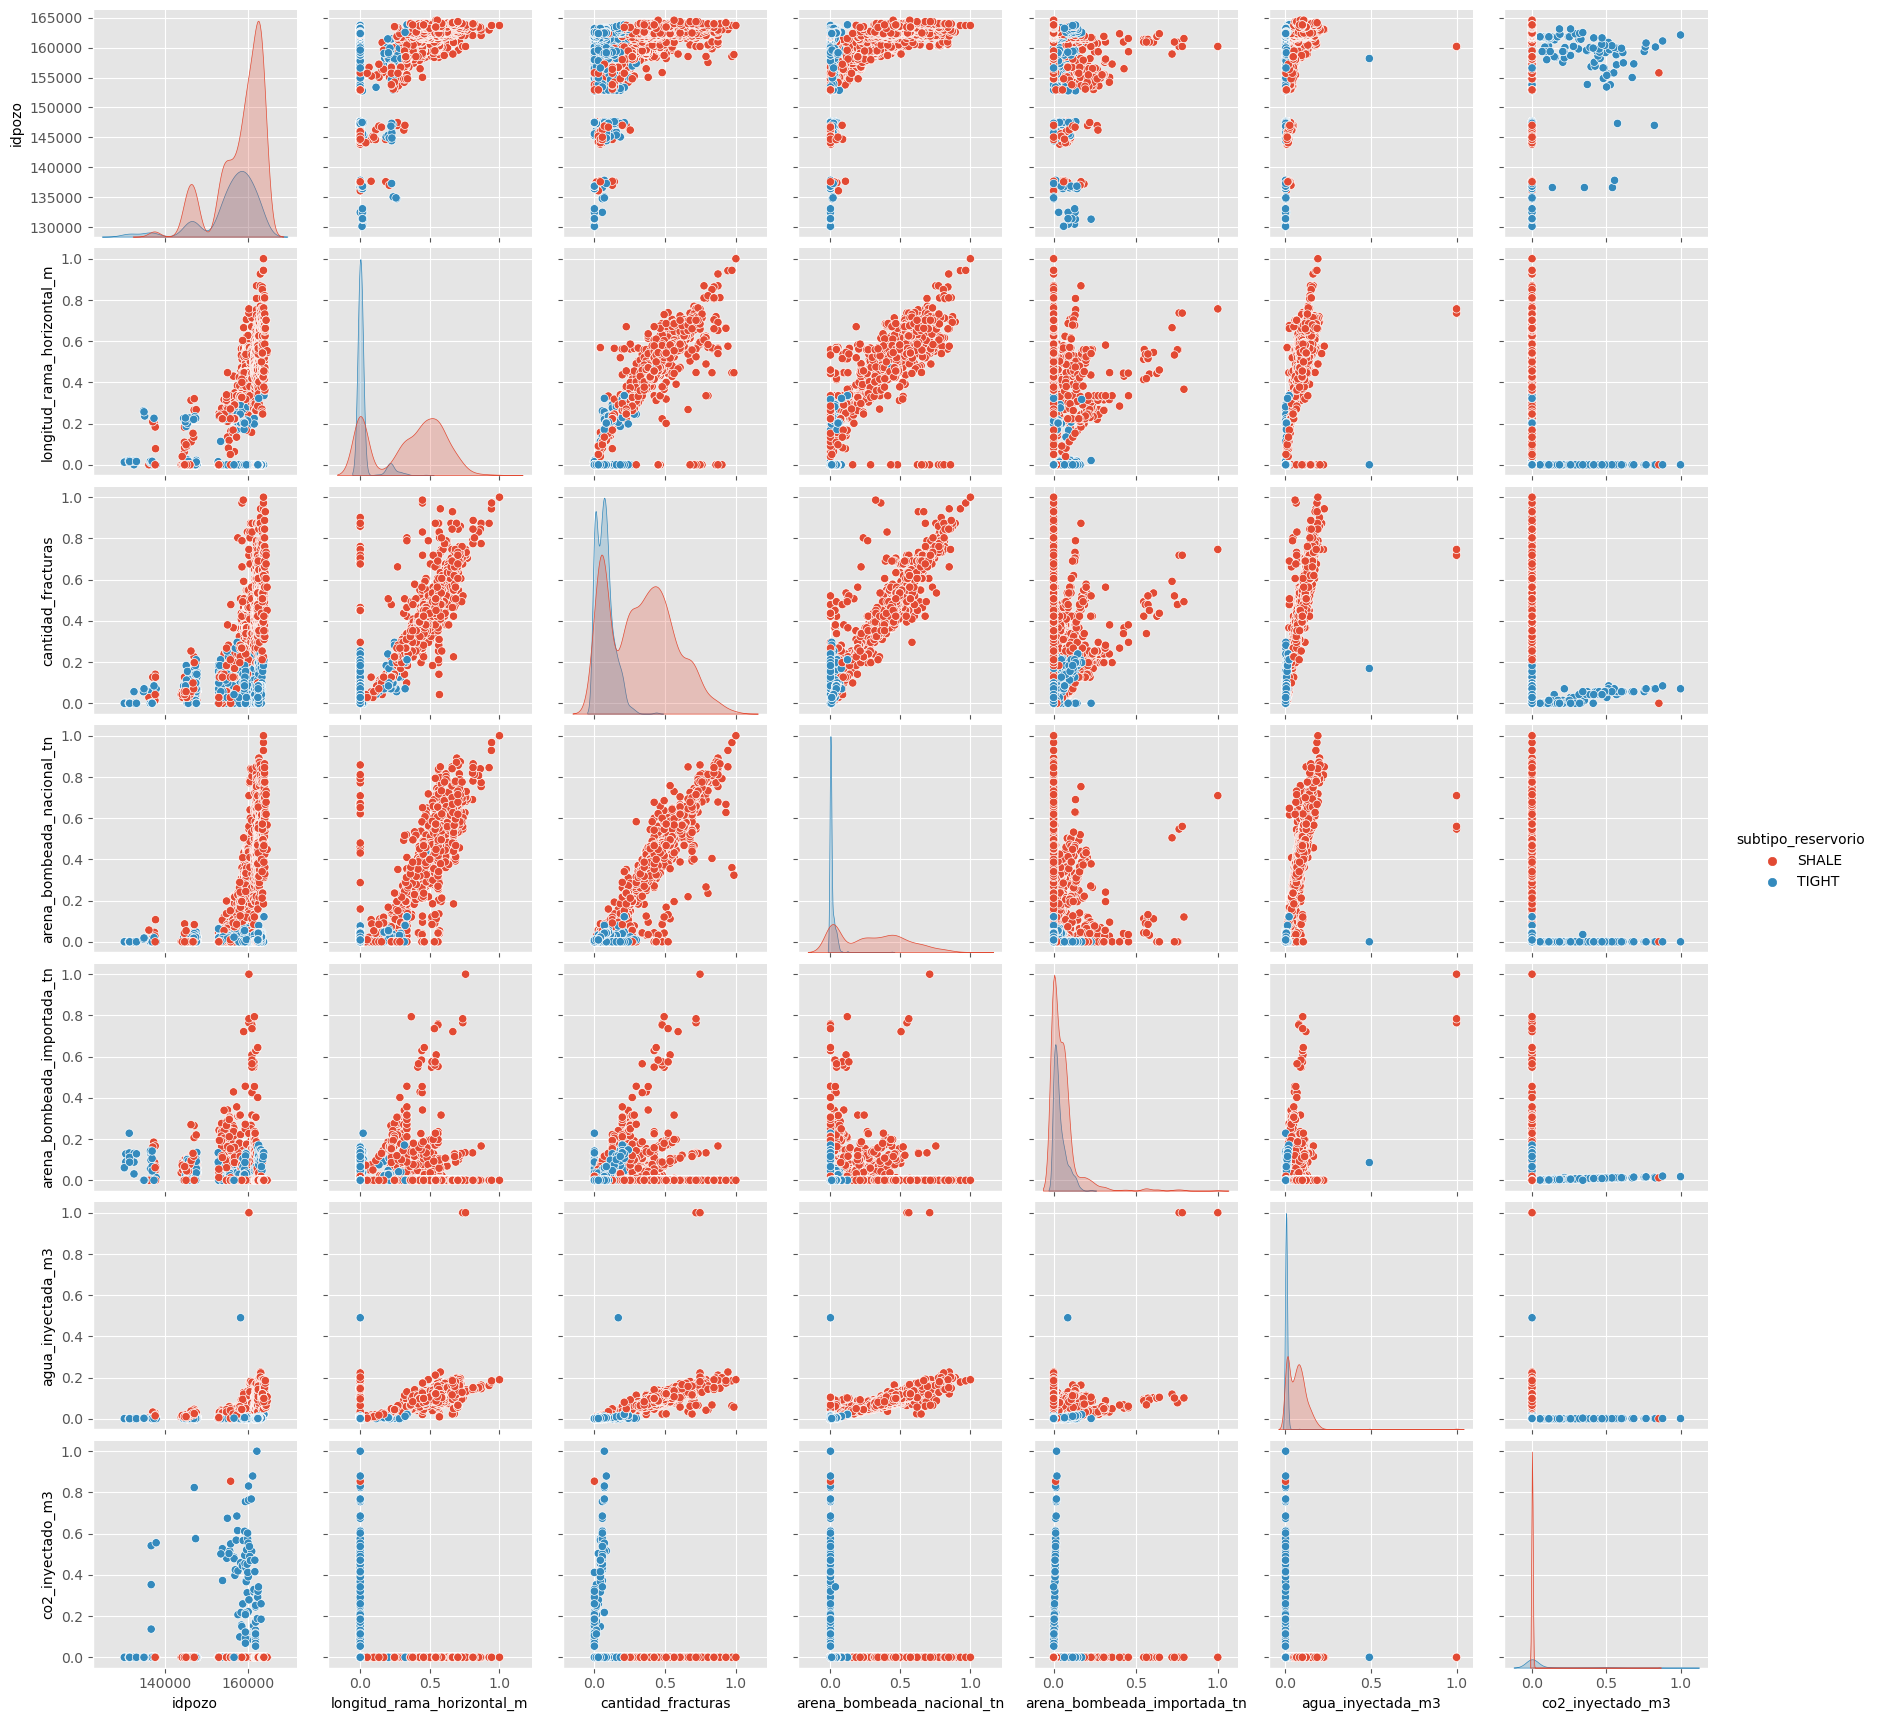

In [362]:
fig =sns.pairplot(fracturas_selecc3, hue='subtipo_reservorio')

fig.savefig("fract_s3_vs_subtipo_reservorio.png")

### 1) Traemos la base limpia 

In [363]:
fracturas_selecc3 = pd.read_csv('fracturas_selecc3.csv')

In [364]:
fracturas_selecc3.head()

,idpozo,subtipo_reservorio,longitud_rama_horizontal_m,cantidad_fracturas,tipo_terminacion,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,co2_inyectado_m3
0,159910,SHALE,0.000000,0.028169,Punzado,0.000000,0.000000,0.005060,0.0
1,159910,SHALE,0.000000,0.000000,Punzado,0.000000,0.000000,0.001117,0.0
2,159219,SHALE,0.321041,0.239437,Tapón disparo,0.219360,0.045343,0.047969,0.0
3,159220,SHALE,0.339133,0.253521,Tapón disparo,0.227661,0.047149,0.051004,0.0
4,159221,SHALE,0.331092,0.253521,Tapón disparo,0.230304,0.048137,0.050555,0.0


In [365]:
#Observamos el nombre de las variables
fracturas_selecc3.columns

Index(['idpozo', 'subtipo_reservorio', 'longitud_rama_horizontal_m',
       'cantidad_fracturas', 'tipo_terminacion', 'arena_bombeada_nacional_tn',
       'arena_bombeada_importada_tn', 'agua_inyectada_m3', 'co2_inyectado_m3'],
      dtype='object')

In [366]:
#Corroboramos la inexistencia de datos nulos
fracturas_selecc3.isna().sum()

idpozo                         0
subtipo_reservorio             2
longitud_rama_horizontal_m     0
cantidad_fracturas             0
tipo_terminacion               0
arena_bombeada_nacional_tn     0
arena_bombeada_importada_tn    0
agua_inyectada_m3              0
co2_inyectado_m3               0
dtype: int64

In [367]:
# Eliminar filas con valores nulos
fracturas_sin_nulos = fracturas_selecc3.dropna()

In [368]:
fracturas_sin_nulos.isna().sum()

idpozo                         0
subtipo_reservorio             0
longitud_rama_horizontal_m     0
cantidad_fracturas             0
tipo_terminacion               0
arena_bombeada_nacional_tn     0
arena_bombeada_importada_tn    0
agua_inyectada_m3              0
co2_inyectado_m3               0
dtype: int64

In [369]:
fracturas_sin_nulos

,idpozo,subtipo_reservorio,longitud_rama_horizontal_m,cantidad_fracturas,tipo_terminacion,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,co2_inyectado_m3
0,159910,SHALE,0.000000,0.028169,Punzado,0.000000,0.000000,0.005060,0.0
1,159910,SHALE,0.000000,0.000000,Punzado,0.000000,0.000000,0.001117,0.0
2,159219,SHALE,0.321041,0.239437,Tapón disparo,0.219360,0.045343,0.047969,0.0
3,159220,SHALE,0.339133,0.253521,Tapón disparo,0.227661,0.047149,0.051004,0.0
4,159221,SHALE,0.331092,0.253521,Tapón disparo,0.230304,0.048137,0.050555,0.0
...,...,...,...,...,...,...,...,...,...
2351,163626,SHALE,0.423498,0.394366,Tapón disparo,0.461713,0.000000,0.098659,0.0
2352,163627,SHALE,0.426625,0.394366,Tapón disparo,0.451216,0.000000,0.097101,0.0
2353,163793,SHALE,0.454992,0.422535,Tapón disparo,0.471278,0.000000,0.099482,0.0
2354,163794,SHALE,0.376815,0.352113,Tapón disparo,0.386365,0.000000,0.082774,0.0


In [370]:
fracturas_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   idpozo                       2354 non-null   int64  
 1   subtipo_reservorio           2354 non-null   object 
 2   longitud_rama_horizontal_m   2354 non-null   float64
 3   cantidad_fracturas           2354 non-null   float64
 4   tipo_terminacion             2354 non-null   object 
 5   arena_bombeada_nacional_tn   2354 non-null   float64
 6   arena_bombeada_importada_tn  2354 non-null   float64
 7   agua_inyectada_m3            2354 non-null   float64
 8   co2_inyectado_m3             2354 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 183.9+ KB


### VARIABLES: Cantidad de Fracturas - Agua Inyectada m3 

In [371]:
#Consideramos las variables: "Ccantidad_fracturas , agua_inyectada_m3 y subtipo_reservorio"
X= fracturas_sin_nulos.iloc[:, [3,7,1]].values

In [372]:
X

array([[0.028169014084507, 0.0050600854901648, 'SHALE'],
       [0.0, 0.0011169344765281, 'SHALE'],
       [0.2394366197183098, 0.0479691711192018, 'SHALE'],
       ...,
       [0.4225352112676057, 0.0994816307094432, 'SHALE'],
       [0.352112676056338, 0.0827741524980425, 'SHALE'],
       [0.4225352112676057, 0.098707222805717, 'SHALE']], dtype=object)

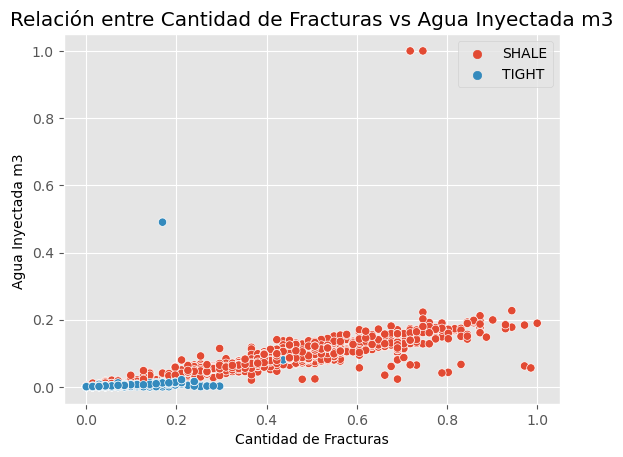

In [373]:
#Miramos cómo se relacionan las mencionadas variables
sns.scatterplot(x = X[:, 0], y = X[:, 1],c='blue',hue=X[:, 2])
plt.title('Relación entre Cantidad de Fracturas vs Agua Inyectada m3')
plt.xlabel('Cantidad de Fracturas')
plt.ylabel('Agua Inyectada m3 ')
plt.show()

### VARIABLES: Cantidad de Fracturas - Arena Bombeada Nacional 

In [374]:
#Consideramos las variables: "Cantidad_fracturas , arena_bombeada_nacional_tn y subtipo_reservorio"
X= fracturas_sin_nulos.iloc[:, [3,5,1]].values

In [375]:
X

array([[0.028169014084507, 0.0, 'SHALE'],
       [0.0, 0.0, 'SHALE'],
       [0.2394366197183098, 0.2193602635283447, 'SHALE'],
       ...,
       [0.4225352112676057, 0.4712778295069493, 'SHALE'],
       [0.352112676056338, 0.3863650068659249, 'SHALE'],
       [0.4225352112676057, 0.4663790128161209, 'SHALE']], dtype=object)

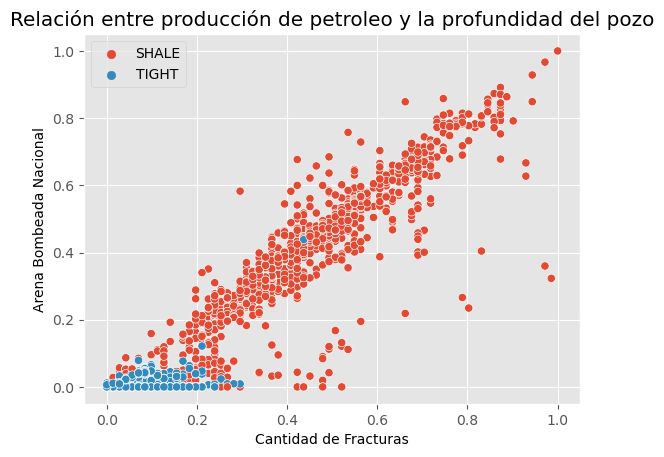

In [376]:
#Miramos cómo se relacionan las mencionadas variables
sns.scatterplot(x = X[:, 0], y = X[:, 1],c='blue', hue=X[:, 2])
plt.title('Relación entre producción de petroleo y la profundidad del pozo')
plt.xlabel('Cantidad de Fracturas')
plt.ylabel('Arena Bombeada Nacional')
plt.show()

### VARIABLES:  Longitud rama horizontal vs Cantidad de Fracturas

In [377]:
#Consideramos los variables: "cantidad_fracturas" , "longitud_rama_horizontal_m" y "subtipo_reservorio"
X= fracturas_sin_nulos.iloc[:, [2,3,1]].values

In [378]:
X

array([[0.0, 0.028169014084507, 'SHALE'],
       [0.0, 0.0, 'SHALE'],
       [0.3210408755863301, 0.2394366197183098, 'SHALE'],
       ...,
       [0.4549921822649095, 0.4225352112676057, 'SHALE'],
       [0.3768148313602859, 0.352112676056338, 'SHALE'],
       [0.4549921822649095, 0.4225352112676057, 'SHALE']], dtype=object)

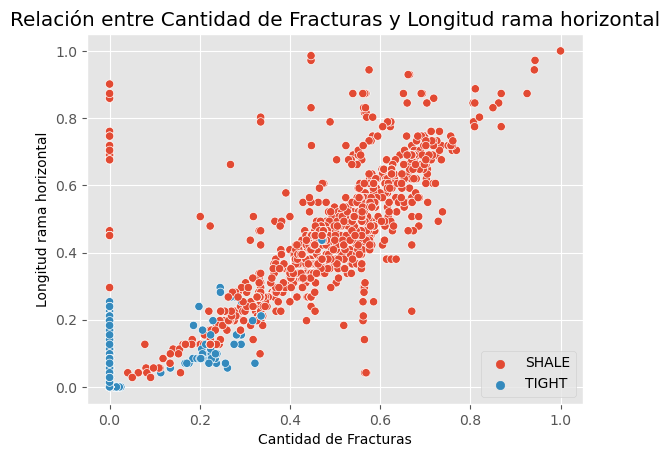

In [380]:
#Miramos cómo se relacionan las mencionadas variables
sns.scatterplot(x = X[:, 0], y = X[:, 1],c='blue', hue=X[:, 2])
plt.title('Relación entre Cantidad de Fracturas y Longitud rama horizontal')
plt.xlabel('Cantidad de Fracturas')
plt.ylabel('Longitud rama horizontal')
plt.show()

In [382]:
#Consideramos sólo dos variables: "cantidad_fracturas" y " arena_bombeada_nacional_tn"
X= fracturas_sin_nulos.iloc[:, [3,5]].values

In [383]:
K = np.arange(1, 10)
lista_inercias = []

for i in K:
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(X)
  lista_inercias.append(kmeans.inertia_)

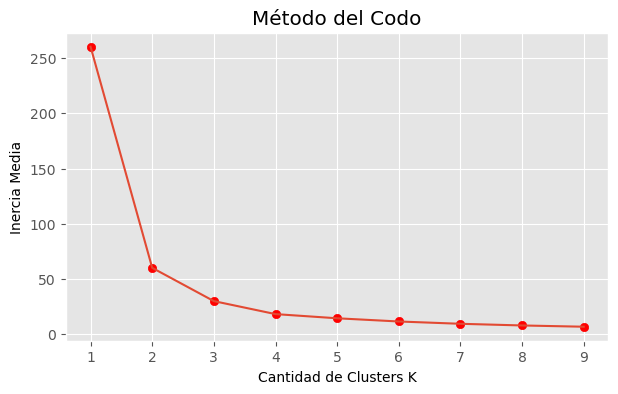

In [384]:
plt.figure(figsize = (7,4))
plt.plot(K,lista_inercias)
plt.scatter(K,lista_inercias,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Inercia Media')
plt.title('Método del Codo')
plt.show()

En este gráfico observamos que el número de clústers donde la disminución en la variación cae abruptamente, es decir, donde se grafica el "codo", es en 2 clústers.

In [385]:
kmeansmodel = KMeans(n_clusters= 2, random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

In [386]:
etiquetas_kmeans = kmeansmodel.labels_
np.unique(etiquetas_kmeans)

array([0, 1])

In [387]:
centros = kmeansmodel.cluster_centers_
print(centros)

[[0.10585101 0.04523378]
 [0.51417106 0.48586031]]


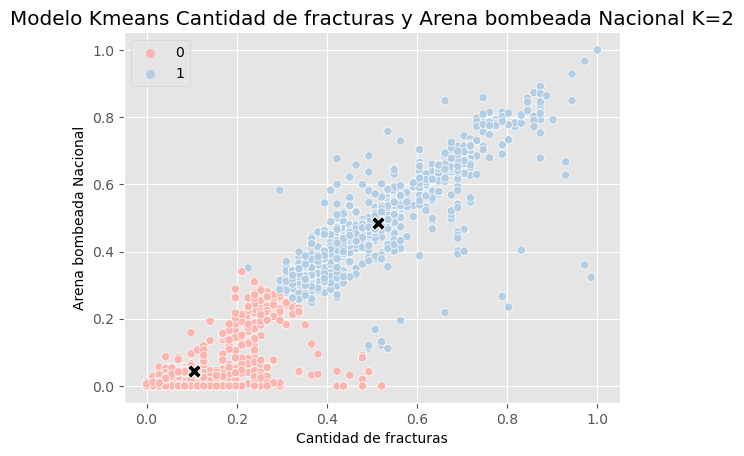

In [388]:
# Graficamos los datos y centroides en 2D
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue=etiquetas_kmeans, palette='Pastel1')
sns.scatterplot(x = centros[:, 0], y = centros[:, 1], color='black', marker="X", s=100)
plt.title('Modelo Kmeans Cantidad de fracturas y Arena bombeada Nacional K=2')
plt.xlabel('Cantidad de fracturas')
plt.ylabel('Arena bombeada Nacional')
sns.despine()
plt.show()

En base a este análisis no supervisado se observa que el los pozas pueden agruparse en 2 grupos en base a la cantidad de fracturas y arena bombeada nacional. 
Clúster 1 (Rosa): De Alto porcentaje de fracturas y nivel Alto de arena bombeada nacional.
Clúster 2 (Celeste): De Bajo porcentaje de Extracción de fracturas y nivel medio de arena bombeada nacional.


Una vez establecidos los clústers, podremos observar la cantidad de puntos asignados a cada cluster.

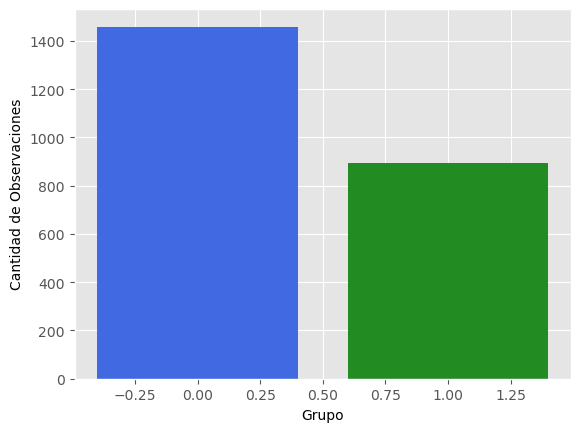

In [389]:
cluster_counts = np.bincount(y_kmeans)
cluster_labels = list(range(len(cluster_counts)))
colors = ['royalblue', 'forestgreen', 'purple']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show() 

#### Evaluación con Suma de los Cuadrados de las Distancias (SSD)

In [390]:
# Calculamos la SSD
SSD = kmeansmodel.inertia_
print("SSD: ", SSD)

SSD:  60.114452474616535


Esta métrica mide la distancia entre cada punto y su centroide asignado, y luego suma los cuadrados de estas distancias. La SSD es una medida de cuán bien los centroides representan los puntos en el dataset, y se espera que disminuya a medida que se ajusta el modelo.
- Una SSD baja indica que los puntos dentro de un mismo clúster son muy similares entre sí, lo que sugiere que los clústers son coherentes y bien definidos.

El resultado obtenido nos sugiere que los clusters obtenidos por el algoritmo K-means son relativamente coherentes y bien definidos.

#### Evaluación con Silhoutte

In [396]:
silhouette_coef = silhouette_score(X, etiquetas_kmeans)
print("Coeficiente de Silueta para KMeans: ", silhouette_coef)

Coeficiente de Silueta para KMeans:  0.6846710330244324


Si el Coeficiente de Silhouette es cercano a 0, significa que los puntos están cerca del límite entre dos clústers, y que no está claro a qué clúster deberían pertenecer. Si es cercano a 1 quiere decir que los clústers están bien definidos.

Vemos que nos da un coeficiente de 0, por lo que esto nos indicaría que no tenemos una buena separación entre los clústers.

In [397]:
K = np.arange(2,20)
lista_silueta = []
for i in K:
  kmeans_silueta = KMeans(n_clusters = i, random_state = 0)
  kmeans_silueta.fit(X)
  lista_silueta.append(silhouette_score(X, kmeans_silueta.labels_))

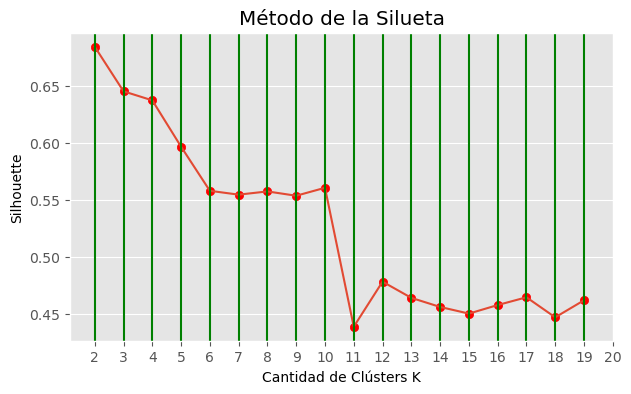

In [398]:
plt.figure(figsize = (7,4))
plt.plot(K,lista_silueta)
plt.scatter(K,lista_silueta,c='r')
plt.xlabel('Cantidad de Clústers K')
plt.ylabel('Silhouette')
plt.title('Método de la Silueta')
plt.xticks(np.arange(2,21))
for x in np.arange(2,20):
  plt.axvline(x,0,1,color='green')
plt.show()

## Clusterización en base a todas las características de las fracturas.
Ahora bien, nos interesa generar clusters en base a todas las dimensiones de las fracturas que contiene el dataset.

Dado que vamos a utilizar toda la información y dado que no queremos sesgar los resultados, identificamos el valor promedio y la dispersión de las variables.

In [399]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
fracturas_sin_nulos.mean(axis=0)

----------------------
Media de cada variable
----------------------


idpozo                         157479.844945
longitud_rama_horizontal_m          0.255552
cantidad_fracturas                  0.261096
arena_bombeada_nacional_tn          0.212762
arena_bombeada_importada_tn         0.049773
agua_inyectada_m3                   0.049915
co2_inyectado_m3                    0.015093
dtype: float64

In [400]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
fracturas_sin_nulos.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


idpozo                         3.742058e+07
longitud_rama_horizontal_m     6.573796e-02
cantidad_fracturas             5.279573e-02
arena_bombeada_nacional_tn     5.782868e-02
arena_bombeada_importada_tn    7.065026e-03
agua_inyectada_m3              3.663696e-03
co2_inyectado_m3               7.389431e-03
dtype: float64

La varianza es muy distinta entre las variables, en el caso de idpozo, la varianza es varios órdenes de magnitud superior al resto.

Es por ello que decidimos estandarizar las variables.

In [394]:
fracturas_1=fracturas_sin_nulos.select_dtypes(include=np.number)

In [285]:
scaler = StandardScaler()
scaler.fit(fracturas_1)
fracturas_scaled = scaler.transform(fracturas_1)

In [402]:
fracturas_scaled = pd.DataFrame(data = fracturas_scaled, columns = fracturas_1.columns)

In [403]:
fracturas_scaled.head()

,idpozo,longitud_rama_horizontal_m,cantidad_fracturas,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,co2_inyectado_m3
0,0.397348,-0.996926,-1.013940,-0.884941,-0.592282,-0.741213,-0.175613
1,0.397348,-0.996926,-1.136561,-0.884941,-0.592282,-0.806372,-0.175613
2,0.284364,0.255479,-0.094284,0.027445,-0.052710,-0.032155,-0.175613
3,0.284528,0.326059,-0.032973,0.061971,-0.031226,0.017989,-0.175613
4,0.284691,0.294690,-0.032973,0.072963,-0.019467,0.010582,-0.175613


In [404]:
W=fracturas_scaled.values

Como surge de la gráfica, el punto donde se dibuja el codo, es en k=2. Se puede decir, entonces, que es el número correcto de clústers para agrupar todas las variables del dataset.

In [405]:
kmeansmodel_W = KMeans(n_clusters= 2, random_state=0)
y_kmeans_W= kmeansmodel_W.fit_predict(W)

In [406]:
centros_W = kmeansmodel_W.cluster_centers_
print(centros_W)

[[-0.53846213 -0.75843363 -0.75672325 -0.76487593  0.10328623 -0.64005739
   0.13614613]
 [ 0.69455329  0.97829085  0.97608466  0.98660067 -0.13322718  0.82559932
  -0.17561262]]


In [407]:
etiquetas_kmeans_W = kmeansmodel_W.labels_
np.unique(etiquetas_kmeans_W)

array([0, 1])

In [408]:
etiquetas_kmeans_W

array([0, 0, 0, ..., 1, 1, 1])

In [409]:
#Transformamos las etiquetas a un dataframe y después mergeamos
cluster_df = pd.DataFrame(etiquetas_kmeans_W, columns=['cluster'])
df_merged = pd.merge(fracturas_scaled, cluster_df, right_index=True, left_index=True)

In [410]:
df_merged.head()

,idpozo,longitud_rama_horizontal_m,cantidad_fracturas,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,co2_inyectado_m3,cluster
0,0.397348,-0.996926,-1.013940,-0.884941,-0.592282,-0.741213,-0.175613,0
1,0.397348,-0.996926,-1.136561,-0.884941,-0.592282,-0.806372,-0.175613,0
2,0.284364,0.255479,-0.094284,0.027445,-0.052710,-0.032155,-0.175613,0
3,0.284528,0.326059,-0.032973,0.061971,-0.031226,0.017989,-0.175613,1
4,0.284691,0.294690,-0.032973,0.072963,-0.019467,0.010582,-0.175613,1


A continuación observamos cómo clasifica en clústers considerando todas las variables, las dos dimensiones que realizamos por separado.

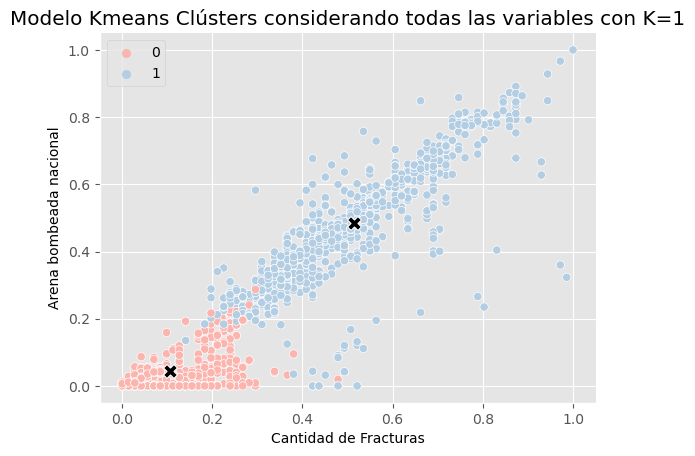

In [412]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue=etiquetas_kmeans_W, palette='Pastel1')
sns.scatterplot(x = centros[:, 0], y = centros[:, 1], color='black', marker="X", s=100)
plt.title('Modelo Kmeans Clústers considerando todas las variables con K=1')
plt.xlabel('Cantidad de Fracturas')
plt.ylabel('Arena bombeada nacional')
sns.despine()
plt.show()

In [413]:
#### Evaluación con Suma de los Cuadrados de las Distancias (SSD)

In [414]:
# Calculamos la SSD
SSD_W = kmeansmodel_W.inertia_
print("SSD: ", SSD_W)

SSD:  9003.291053763458


Éste resultado y comparando con el SSD obtenido en las dos dimensiones, sugiere que los clústers obtenidos por el algoritmo K-means se encuentran levemente bien definidos.

#### Evaluación con Silhoutte

In [415]:
silhouette_coef_W = silhouette_score(W, etiquetas_kmeans_W)
print("Coeficiente de Silueta para KMeans: ", silhouette_coef_W)

Coeficiente de Silueta para KMeans:  0.48924564541649274


Si el Coeficiente de Silhouette es cercano a 0, significa que los puntos están cerca del límite entre dos clústers, y que no está claro a qué cluster deberían pertenecer, mientras que si es cercano a 1 quiere decir que los clústers están bien definidos.

Vemos que nos da un coeficiente de 0.49, por lo que esto nos indicaría que tenemos una separación entre los clusters, que no es del todo buena.

In [416]:
K = np.arange(2,20)
lista_silueta = []
for i in K:
  kmeans_silueta = KMeans(n_clusters = i, random_state = 0)
  kmeans_silueta.fit(W)
  lista_silueta.append(silhouette_score(W, kmeans_silueta.labels_))

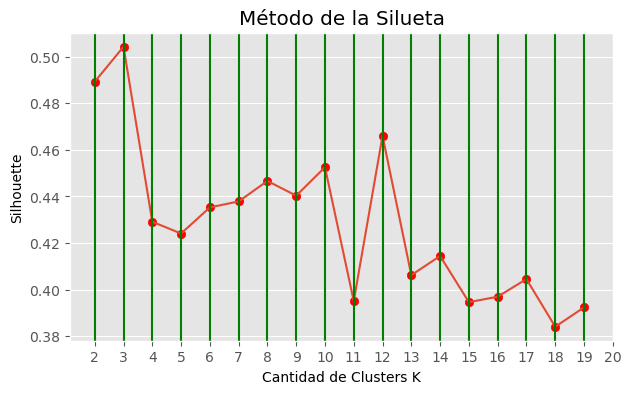

In [417]:
plt.figure(figsize = (7,4))
plt.plot(K,lista_silueta)
plt.scatter(K,lista_silueta,c='r')
plt.xlabel('Cantidad de Clusters K')
plt.ylabel('Silhouette')
plt.title('Método de la Silueta')
plt.xticks(np.arange(2,21))
for x in np.arange(2,20):
  plt.axvline(x,0,1,color='green')
plt.show()

Esta gráfica nos ayuda a determinar cuántas dimensiones (componentes principales) necesitamos retener para mantener una cantidad significativa
de la varianza en nuestros datos.
Si la curva alcanza un valor cercano a 1, las dimensiones principales capturan la mayor parte de la información en nuestros datos. En este caso, entre la octava y la novena dimensión alcanza un valor cercano a 1.